Start your notebook here:

In [36]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install seaborn

#import the libraries we'll be using

import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from dateutil.parser import parse

In [37]:
filepath = "../cars.csv"
data = pd.read_csv(filepath, index_col = 0)

In [38]:
print(data)

                        car_name  reviews_count fuel_type  \
1                Maruti Alto K10             51    Petrol   
2                  Maruti Brezza             86    Petrol   
3                  Mahindra Thar            242    Diesel   
4                Mahindra XUV700            313    Diesel   
5             Mahindra Scorpio-N            107    Diesel   
..                           ...            ...       ...   
199     Mercedes-Benz AMG A 45 S             35    Petrol   
200  BMW 3 Series Gran Limousine              3    Petrol   
201               MG Hector Plus              2    Diesel   
202                   Audi RS Q8              9    Petrol   
203         Maruti Alto 800 tour              4    Petrol   

     engine_displacement  no_cylinder  seating_capacity transmission_type  \
1                    998            3               5.0         Automatic   
2                   1462            4               5.0         Automatic   
3                   2184            

In [39]:
data['seating_capacity'] = data['seating_capacity'].replace(np.nan, 0)

In [40]:
total_null = data.isnull().sum().sort_values(ascending = False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  203


,Total Missing,In Percent
car_name,0,0.0
reviews_count,0,0.0
fuel_type,0,0.0
engine_displacement,0,0.0
no_cylinder,0,0.0
seating_capacity,0,0.0
transmission_type,0,0.0
fuel_tank_capacity,0,0.0
body_type,0,0.0
rating,0,0.0


In [41]:
duplicates = data[data.duplicated()]

duplicates.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp


In [42]:
data = data.drop_duplicates()

data.shape

(203, 16)

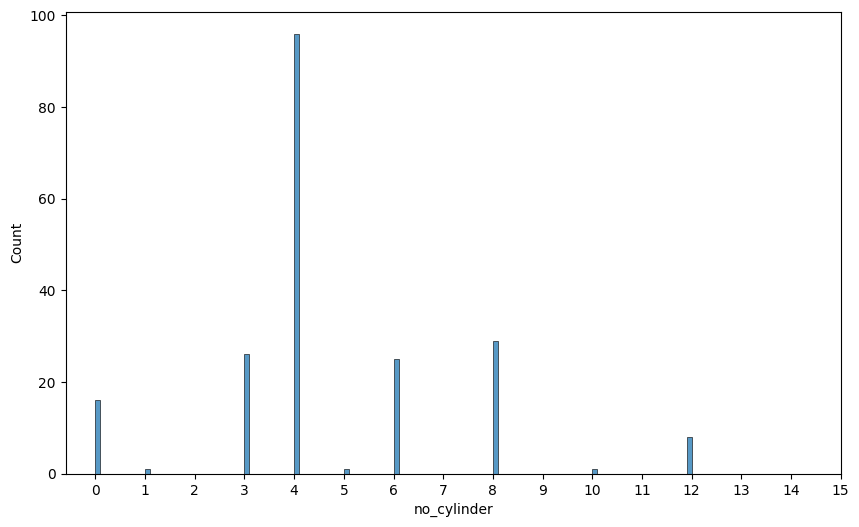

In [84]:
index=range(0,16)
plt.figure(figsize=(10, 6))
cylinder_count = data[["car_name","no_cylinder"]].sort_values(by = 'no_cylinder', ascending = False)
sns.histplot(data = cylinder_count['no_cylinder'], binwidth=1)
plt.xticks([i for i in index], [i for i in index])
plt.show()


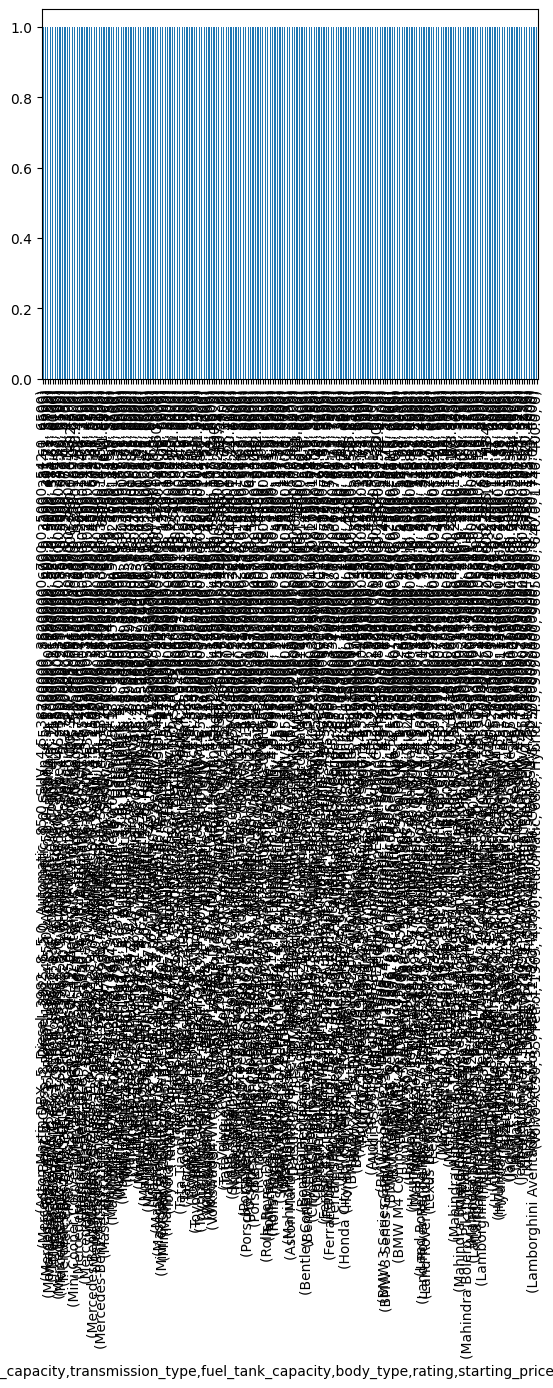

In [54]:
df_cylinders = pd.DataFrame({
    'car_name': data['car_name'].tolist(),
    'no_cylinder': data['no_cylinder'].tolist()
})

df_cylinders = df_cylinders.explode('no_cylinder')
list_cylinders = pd.DataFrame(df_cylinders['no_cylinder'])
count_cylinders = data.value_counts().plot(kind='bar')